In [48]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import librosa

In [49]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


(2, 15876000)


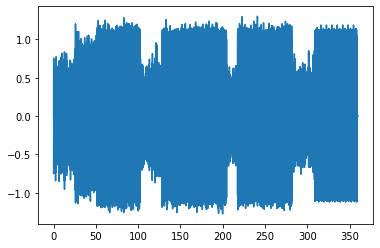

In [50]:
# Charger le fichier audio en utilisant Librosa
audio, sr = librosa.load("songTest.mp3", sr=None, mono=False)
print(np.shape(audio))

plt.figure()
Mono = (audio[0] + audio[1]) / 2
t = np.linspace(0, len(Mono) / sr, len(Mono))
plt.plot(t, Mono)
plt.show()

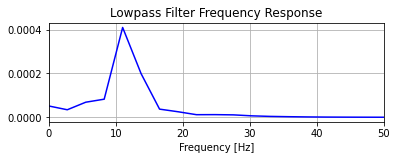

In [51]:
# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
fs = sr 
cutoff = 3.667  # desired cutoff frequency of the filter, Hz
cutoff = 4.2

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
# plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
# plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.xlim(0, 50)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

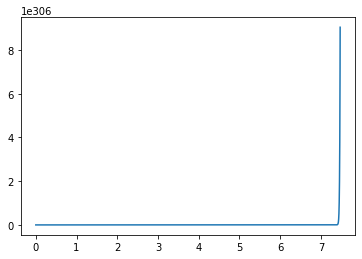

In [52]:
Monofilter = butter_lowpass_filter(Mono, cutoff, fs, order)
plt.plot(t, Monofilter)
# plt.plot(t, Mono)
plt.show()

In [53]:
# Effectuer une FFT sur l'audio
fft = np.fft.fft(audio)


In [54]:
# Obtenir les fréquences en utilisant la fonction fftfreq de Numpy
freqs = np.fft.fftfreq(len(fft), d=1/sr)


[     0. -22050.]


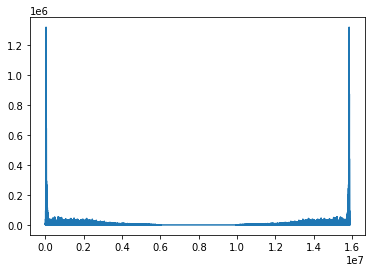

In [55]:
# Afficher les fréquences obtenues
print(freqs)

# Afficher le spectre
plt.plot(np.abs(fft[0]))

# Ajouter des étiquettes et un titre aux axes
# plt.xlabel('Fréquence (Hz)')
# plt.ylabel('Amplitude')
# plt.title('Spectre de l\'audio')

# Afficher le graphe
plt.show()

In [56]:
# 250 bpm = 4.166666666666667 beats per second
# faire un filtre de fréquence de coupure 4.2 Hz


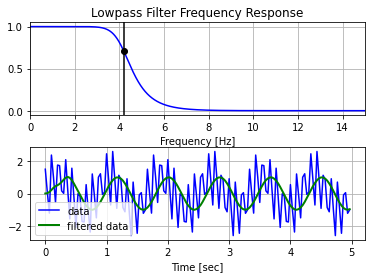

In [57]:


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz
cutoff = 4.2

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()